In [15]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [16]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import warnings
#import scipy.stats as stats

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

%matplotlib inline

In [17]:
# Load .env enviroment variables
load_dotenv('.env')

True

# Part 1 - Litecoin and Chainlink Cryptocurrency Analysis

In [18]:
# Set current amount of crypto assets
ltc_shares = 250
chl_shares = 350

tickers = ["LTC", "LINK"]

In [19]:
# Crypto API URLs
ltc_url = "https://api.alternative.me/v2/ticker/Litecoin/?convert=USD"
chl_url = "https://api.alternative.me/v2/ticker/Chainlink/?convert=USD"
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"

In [20]:
# Fetch current LTC price
# YOUR CODE HERE!
response_data_ltc=requests.get(ltc_url)
print(response_data_ltc)
response_content_ltc = response_data_ltc.content
data_ltc = response_data_ltc.json()

#print(json.dumps(data_ltc, indent=4))

ltc_df = data_ltc['data']
#display(ltc_df)


my_ltc=ltc_df['2']['name']

my_ltc_value=ltc_df['2']['quotes']['USD']['price']

# Fetch current CHL price
# YOUR CODE HERE!
response_data_chl=requests.get(chl_url)
print(response_data_chl)
response_content_chl = response_data_chl.content
data_chl = response_data_chl.json()

#print(json.dumps(data_chl, indent=4))

chl_df = data_chl['data']

my_chl=chl_df['1975']['name']
# Compute current value of my crpto
# YOUR CODE HERE!
my_chl_value=chl_df['1975']['quotes']['USD']['price']


# Print current crypto wallet balance
print(f"The current value of your {my_ltc} LTC is ${my_ltc_value:0.2f}")
print(f"The current value of your {my_chl} CHL is ${my_chl_value:0.2f}")

<Response [200]>
<Response [200]>
The current value of your Litecoin LTC is $54.56
The current value of your Chainlink CHL is $7.88


In [21]:
# Fetch current BTC price
# YOUR CODE HERE!
response_data_btc=requests.get(btc_url)
print(response_data_btc)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()

#print(json.dumps(data_btc, indent=4))

btc_df = data_btc['data']
#display(btc_df)


my_btc=btc_df['1']['name']

my_btc_value=btc_df['1']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")

<Response [200]>
The current value of your Bitcoin BTC is $20197.00


In [25]:

# API Info for fetching data, portfolio, etc. from Alpaca
BASE_URL = "https://paper-api.alpaca.markets"


ALPACA_API_KEY="PKQFYZJP5VJ4RBKC3SM8"
ALPACA_SECRET_KEY="pR5CvJGM6z3ErSIrUXmFJ5zHJbNHc3aIx7a01dKr"

# Instantiate REST API Connection
api = tradeapi.REST(key_id=ALPACA_API_KEY, secret_key=ALPACA_SECRET_KEY,
                    base_url=BASE_URL, api_version='v2')


In [48]:

# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
btc_shares = 200
ticker_btc = ['BTC']
start_date = pd.Timestamp('2017-09-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-28', tz='America/New_York').isoformat()
timeframe = "1Day"

# Get current closing prices for Bitcoin
# YOUR CODE HERE!
df_btc = api.get_bars(
    ticker_btc,
    timeframe,
    start = start_date,
    end = end_date
).df
df_btc.head()


# Reorganize and clean up the Bitcoin DataFrame
BTC = df_btc [df_btc['symbol'] == 'BTC'].drop('symbol', axis=1)
df_btc = df_btc.drop(columns = ['open', 'high', 'low', 'volume', 'trade_count', 'vwap'])
df_btc.index = df_btc.index.date
df_btc.head()

,close,symbol
2021-04-16,99.2447,BTC
2021-04-19,99.1012,BTC
2021-04-20,99.0441,BTC
2021-04-21,98.9705,BTC
2021-04-22,99.0010,BTC


In [49]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv ("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key Type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST (
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2" )

Alpaca key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


In [50]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-09-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-28', tz='America/New_York').isoformat()
timeframe = "1Day"

In [67]:
# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_portfolio.head()
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
LTC = df_portfolio [df_portfolio ['symbol'] == 'LTC'].drop('symbol', axis=1)
LINK = df_portfolio [df_portfolio ['symbol'] == 'LINK'].drop('symbol', axis=1)
df_portfolio


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-09-28 04:00:00+00:00,7.21,7.3788,5.8700,6.02,12941,77,6.734449,LINK
2017-09-29 04:00:00+00:00,6.04,6.8795,6.6000,6.60,1705,31,6.820661,LINK
2017-10-02 04:00:00+00:00,6.87,6.8700,6.8700,6.87,0,0,0.000000,LINK
2017-10-03 04:00:00+00:00,6.87,6.8700,6.8700,6.87,0,0,0.000000,LINK
2017-10-04 04:00:00+00:00,6.87,6.8700,6.8700,6.87,0,0,0.000000,LINK
...,...,...,...,...,...,...,...,...
2022-09-22 04:00:00+00:00,40.15,40.1500,38.9663,39.52,267780,5442,39.448681,LTC
2022-09-23 04:00:00+00:00,39.04,39.3600,38.1700,38.51,247757,5946,38.618079,LTC
2022-09-26 04:00:00+00:00,38.38,38.3800,36.1600,36.77,353356,7001,36.962771,LTC


In [68]:
# Concatenate the cryptocurrency portfolio DataFrames
df_portfolio_crypto = pd.concat([LTC, LINK],axis=1, keys=['LTC','LINK'])
df_portfolio_crypto.head()

LTC                                           \
                            open   high    low  close  volume trade_count   
timestamp                                                                   
2017-09-28 04:00:00+00:00  46.71  47.00  46.55  46.87  276339        3124   
2017-09-29 04:00:00+00:00  47.00  47.08  46.60  46.98  264392        2733   
2017-10-02 04:00:00+00:00  46.93  47.15  46.62  47.10  199240        2153   
2017-10-03 04:00:00+00:00  47.09  47.28  46.64  47.06  231134        2382   
2017-10-04 04:00:00+00:00  47.09  47.13  46.80  47.00  138603        1745   

                                      LINK                               \
                                vwap  open    high   low close   volume   
timestamp                                                                 
2017-09-28 04:00:00+00:00  46.844259  7.21  7.3788  5.87  6.02  12941.0   
2017-09-29 04:00:00+00:00  46.891042  6.04  6.8795  6.60  6.60   1705.0   
2017-10-02 04:00:00+00:00  46.995466  6.87  6.8700  6.87  6.87      0.0   
2017-10-03 04:00:00+00:00  47.031459  6.87  6.8700  6.87  6.87      0.0   
2017-10-04 04:00:00+00:00  46.999983  6.87  6.8700  6.87  6.87      0.0   

                                                 
                          trade_count      vwap  
timestamp                                        
2017-09-28 04:00:00+00:00        77.0  6.734449  
2017-09-29 04:00:00+00:00        31.0  6.820661  
2017-10-02 04:00:00+00:00         0.0  0.000000  
2017-10-03 04:00:00+00:00         0.0  0.000000  
2017-10-04 04:00:00+00:00         0.0  0.000000

In [70]:
# Create and empty Dataframe for closing prices
df_crypto_price = pd.DataFrame()

# Fetch the closing prices of LTC and LINK
df_crypto_price["LTC"] = df_portfolio_crypto["LTC"]["close"]
df_crypto_price["LINK"] = df_portfolio_crypto["LINK"]["close"]


# Drop the time component of the date
df_crypto_price.index = df_crypto_price.index.date

#Display sample data
df_crypto_price.head()

,LTC,LINK
2017-09-28,46.87,6.02
2017-09-29,46.98,6.60
2017-10-02,47.10,6.87
2017-10-03,47.06,6.87
2017-10-04,47.00,6.87


In [71]:
# Drop the null value for cryptocurrency portfolio
df_crypto_price = df_crypto_price.dropna()
df_crypto_price.head()

,LTC,LINK
2017-09-28,46.87,6.02
2017-09-29,46.98,6.60
2017-10-02,47.10,6.87
2017-10-03,47.06,6.87
2017-10-04,47.00,6.87


### What are the daily return, standard deviation and covariance/variance? 

In [87]:
#  Daily Return for Both cryptocurrency
df_daily_return = df_crypto_price
df_daily_return['DR_LTC'] = df_daily_return['LTC'].pct_change(1)
df_daily_return['DR_LINK'] = df_daily_return['LINK'].pct_change(1)

df_daily_return = df_daily_return.drop(columns = ['LTC', 'LINK'])


# mean of daily return
mean_return= df_daily_return.mean()

# standard deviation of daily return
volatility = df_daily_return.std()

# variance and co-variance
covariance = df_daily_return.cov()
variance = df_daily_return.var()


In [95]:
df_daily_return

,DR_LTC,DR_LINK
2017-09-28,NaN,NaN
2017-09-29,0.002347,0.096346
2017-10-02,0.002554,0.040909
2017-10-03,-0.000849,0.000000
2017-10-04,-0.001275,0.000000
...,...,...
2022-09-22,-0.014955,-0.002460
2022-09-23,-0.025557,-0.001233
2022-09-26,-0.045183,0.039506
2022-09-27,-0.012782,-0.038005


### Calculate sharpe ratio for risk analysis.

In [104]:
# sharpe ratio
sharpe_r = mean_return / volatility

sharpe_r

DR_LTC    -0.010905
DR_LINK    0.027347
dtype: float64

### What is the correlation between Litecoin and Chainlink? 

In [89]:
# co_relation of LTC and LINK
co_relation = df_daily_return.corr()

print(co_relation)


           DR_LTC   DR_LINK
DR_LTC   1.000000 -0.135676
DR_LINK -0.135676  1.000000


### Ploting both Litecoin and Chainlink into one graph by sharpe ratio for comparison. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


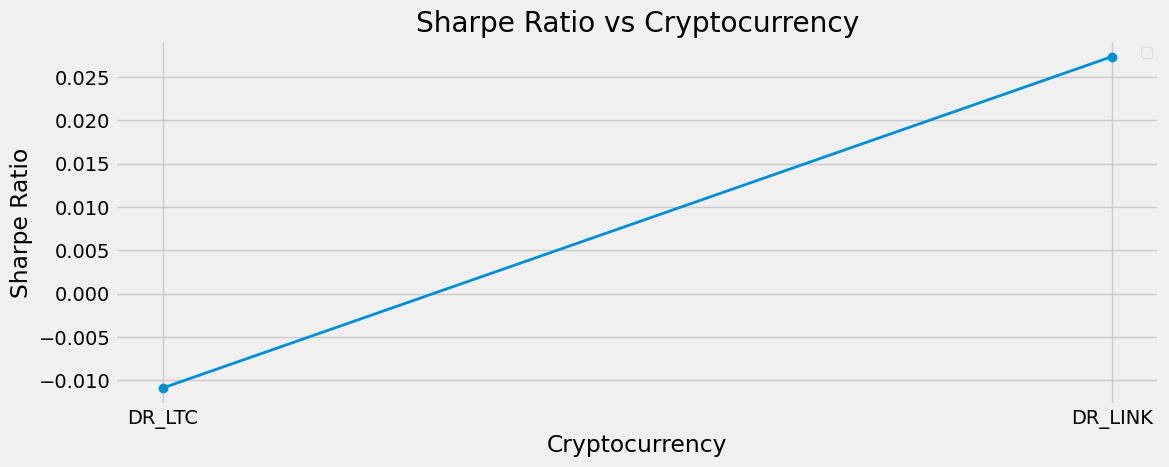

In [111]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# Visualize the stocks daily simple returns / volatility
plt.figure(figsize=(12,4.5)) #Set the figure size (width, height)

# Sharp Ratio of Cryptocurrency
plt.plot(sharpe_r.index, sharpe_r, lw=2, marker="o")


# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper right', fontsize=10)


plt.title('Sharpe Ratio vs Cryptocurrency')
plt.ylabel('Sharpe Ratio') #Label the Y-axis simple returns
plt.xlabel('Cryptocurrency')
plt.show()


In [36]:
# Check if there is null value
df_crypto_price.isnull().sum()

LTC     0
LINK    0
dtype: int64

# Part 2 - Apple and Tesla Stock Analysis

In [37]:
# Read the Apple CSV into DataFrame and display a few rows
appl_df = pd.read_csv('AppleData.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
display(appl_df.head())
display(appl_df.tail())

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-09-28,$149.84,146691400,$147.64,$150.6414,$144.84
2022-09-27,$151.76,84442740,$152.74,$154.72,$149.945
2022-09-26,$150.77,93339410,$149.66,$153.7701,$149.64
2022-09-23,$150.43,96029910,$151.19,$151.47,$148.56
2022-09-22,$152.74,86652540,$152.38,$154.47,$150.91


,Close/Last,Volume,Open,High,Low
Date,,,,,
2017-10-05,$38.8475,84863480,$38.545,$38.86,$38.5125
2017-10-04,$38.37,80355760,$38.4075,$38.465,$38.115
2017-10-03,$38.62,64867200,$38.5025,$38.7725,$38.4775
2017-10-02,$38.4525,74526160,$38.565,$38.6125,$38.18
2017-09-29,$38.53,104818680,$38.3025,$38.5325,$38


In [38]:
# Drop Volume, Open, High and Low, leave Closed price only
appl_df = appl_df.drop(columns=['Volume', 'Open', 'High', 'Low'])
appl_df.head()

,Close/Last
Date,
2022-09-28,$149.84
2022-09-27,$151.76
2022-09-26,$150.77
2022-09-23,$150.43
2022-09-22,$152.74


In [39]:
# Rename the column name to APPL
columns = ['APPLE']
appl_df.columns = columns
appl_df['APPLE'] = appl_df['APPLE'].str.replace("$", "")
appl_df['APPLE'] = appl_df['APPLE'].astype("float")
appl_df.head()

,APPLE
Date,
2022-09-28,149.84
2022-09-27,151.76
2022-09-26,150.77
2022-09-23,150.43
2022-09-22,152.74


In [40]:
# Read the Tesla CSV into DataFrame and display a few rows
tesla_df = pd.read_csv('TeslaData.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
display(tesla_df.head())
display(tesla_df.tail())

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-09-28,$287.81,54664810,$283.08,$289,$277.57
2022-09-27,$282.94,61925190,$283.84,$288.67,$277.51
2022-09-26,$276.01,58076910,$271.83,$284.09,$270.31
2022-09-23,$275.33,63748360,$283.09,$284.5,$272.82
2022-09-22,$288.59,70545410,$299.86,$301.29,$285.82


,Close/Last,Volume,Open,High,Low
Date,,,,,
2017-10-05,$23.6887,62518664,$23.7333,$23.829,$23.4233
2017-10-04,$23.6673,122219864,$23.4167,$23.908,$23.3067
2017-10-03,$23.2093,151838174,$22.3933,$23.2367,$22.0853
2017-10-02,$22.7687,78413166,$22.8347,$22.9133,$22.3673
2017-09-29,$22.74,76485727,$22.7907,$22.9787,$22.5734


In [41]:
# Drop Volume, Open, High and Low, leave Closed price only
tesla_df = tesla_df.drop(columns=['Volume', 'Open', 'High', 'Low'])
tesla_df.head()

,Close/Last
Date,
2022-09-28,$287.81
2022-09-27,$282.94
2022-09-26,$276.01
2022-09-23,$275.33
2022-09-22,$288.59


In [42]:
# Rename the column name to TESLA
columns = ['TESLA']
tesla_df.columns = columns
tesla_df['TESLA'] = tesla_df['TESLA'].str.replace("$", "")
tesla_df['TESLA'] = tesla_df['TESLA'].astype("float")
tesla_df.head()

,TESLA
Date,
2022-09-28,287.81
2022-09-27,282.94
2022-09-26,276.01
2022-09-23,275.33
2022-09-22,288.59


In [43]:
# Concatenate the cryptocurrency portfolio DataFrames
df_portfolio_stock = pd.concat([appl_df, tesla_df],axis="columns", join="inner")
df_portfolio_stock.head()

,APPLE,TESLA
Date,,
2022-09-28,149.84,287.81
2022-09-27,151.76,282.94
2022-09-26,150.77,276.01
2022-09-23,150.43,275.33
2022-09-22,152.74,288.59


In [44]:
# check if there is null value
df_portfolio_stock.isnull().sum()

APPLE    0
TESLA    0
dtype: int64